In [6]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [9]:
dataset= pd.read_csv(r"C:\Users\Phanindra.Panthagani\OneDrive - Fractal Analytics Pvt. Ltd\Fractal_documents\Verizon\avocado.csv")
dataset.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
dataset.describe(include='O')

Date          type   region
count        18249         18249    18249
unique         169             2       54
top     2015-06-21  conventional  NewYork
freq           108          9126      338

In [15]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,10] = le.fit_transform(dataset.iloc[:,10])
dataset.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25            0  conventional   
1   58.33     9505.56     9408.07       97.49            0  conventional   
2  130.50     8145.35     8042.21      103.14            0  conventional   
3   72.58     5811.16     5677.40      133.76            0  conventional   
4   75.78     6183.95     5986.26      197.69            0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [14]:

dataset.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [26]:
X= dataset[['Date','Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']]
y= dataset.iloc[:,2]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)
X_train.head(2)

Date  Total Volume        4046       4225      4770  Small Bags  \
655   2015-05-24     657593.22   198187.29  369924.19  18817.60    50060.32   
1848  2015-06-14    1974806.07  1117926.72  443241.80  27161.21   375290.39   

      Large Bags  XLarge Bags          type  
655     20603.82            0  conventional  
1848     9693.84         2825  conventional

In [28]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X["Date"])
train_dataset['y']=y
train_dataset.head(2)

ds     y
0 2015-12-27  1.33
1 2015-12-20  1.35

In [29]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail()

ds
464 2019-01-15
465 2019-01-16
466 2019-01-17
467 2019-01-18
468 2019-01-19

In [31]:
forecast=prophet_basic.predict(future)


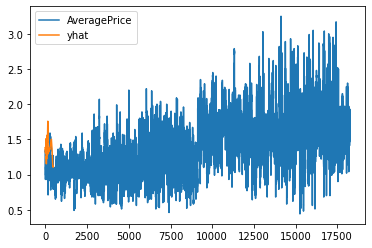

In [32]:

dataset['yhat'] = forecast['yhat']
dataset['AveragePrice'].plot(legend=True)
dataset['yhat'].plot(legend= True)

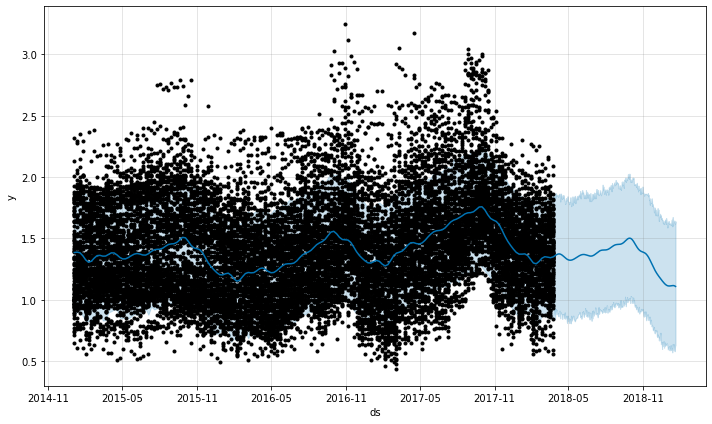

In [33]:
fig1 =prophet_basic.plot(forecast)

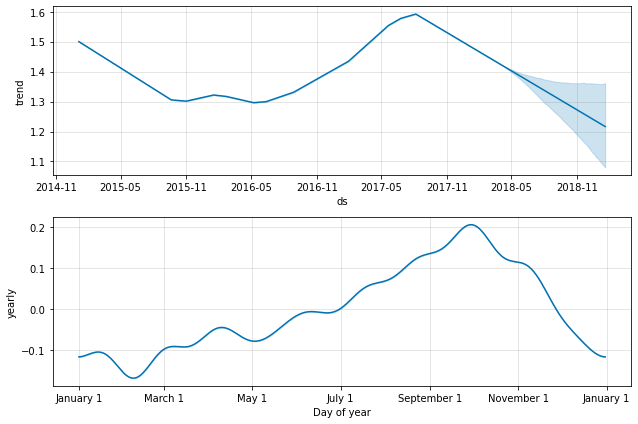

In [34]:
# to view  the forecast components
fig1 = prophet_basic.plot_components(forecast)

By default, Prophet adds 25 changepoints into the initial 80% of the data-set. The number of changepoints can be set by using the n_changepoints parameter when initializing prophet (e.g., model=Prophet(n_changepoints=30)

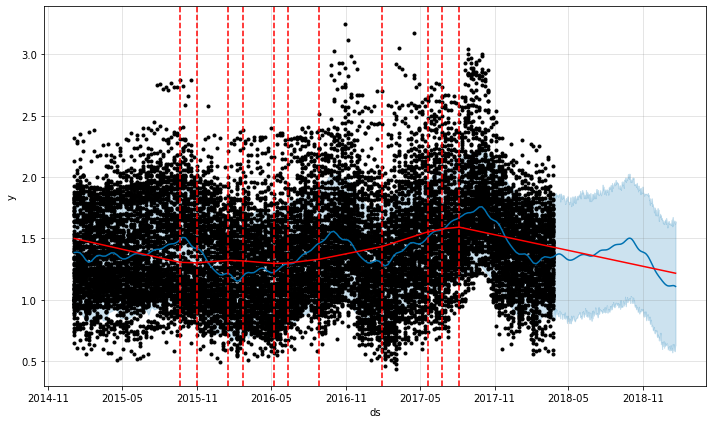

In [36]:
#Change points
#Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change
from prophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [37]:
prophet_basic.changepoints

584     2015-02-08
1168    2015-03-15
1752    2015-04-26
2336    2015-05-31
2920    2015-07-12
3504    2015-08-16
4087    2015-09-20
4671    2015-11-01
5255    2015-12-06
5839    2016-01-17
6423    2016-02-21
7007    2016-03-27
7591    2016-05-08
8175    2016-06-12
8759    2016-07-24
9343    2016-08-28
9927    2016-10-02
10511   2016-11-13
11094   2016-12-18
11678   2017-01-29
12262   2017-03-05
12846   2017-04-09
13430   2017-05-21
14014   2017-06-25
14598   2017-08-06
Name: ds, dtype: datetime64[ns]

### Prophet will also let us take a look at the magnitudes of these possible changepoints

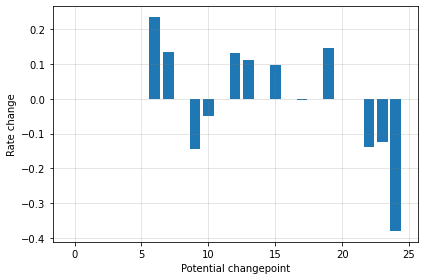

In [38]:
deltas = prophet_basic.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


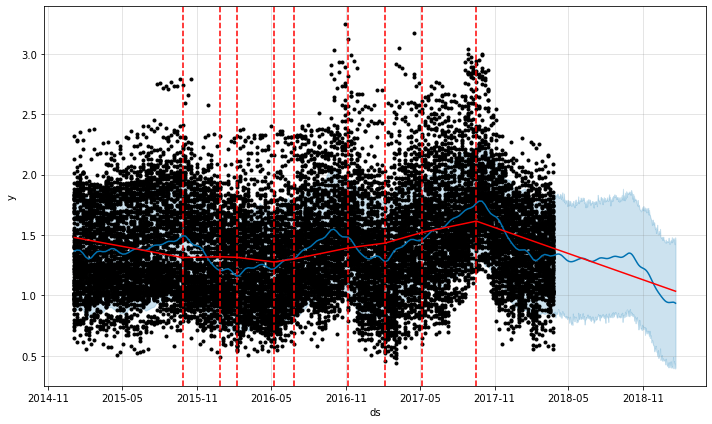

In [39]:
pro_change= Prophet(changepoint_range=0.95, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# # Specifying Change Points Manually

In [47]:
train_dataset['ds'].describe()

<ipython-input-47-49bd4bfc127a>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   18249
unique                    169
top       2015-05-24 00:00:00
freq                      108
first     2015-01-04 00:00:00
last      2018-03-25 00:00:00
Name: ds, dtype: object

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


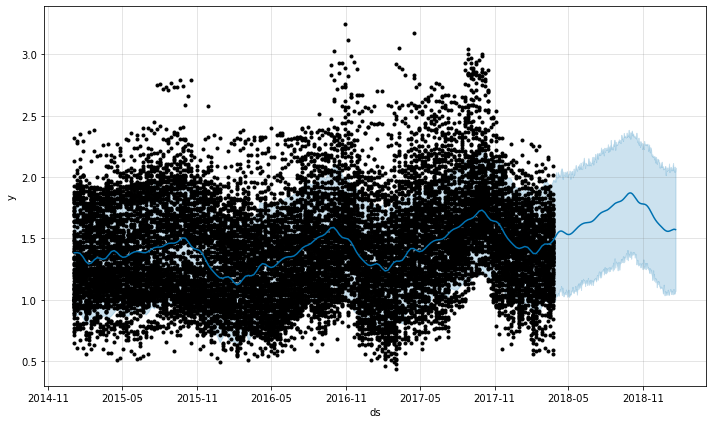

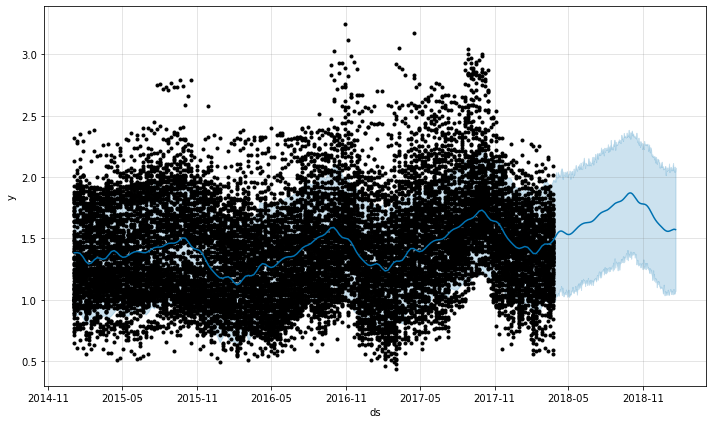

In [48]:
pro1 = Prophet(changepoints=['2015-09-23', '2016-06-22'])
forecast = pro1.fit(train_dataset).predict(future)
pro1.plot(forecast)